# Programación para Análisis de datos

## Análisis de datos bivariado

## Caso: Veterans' Administration Lung Cancer study

### Mtra. Gisel Hernández Chávez

Ensayo aleatorizado de dos regímenes de tratamiento para el cáncer de pulmón. Este es un conjunto de datos de análisis de supervivencia estándar.https://rdrr.io/cran/survival/man/veteran.html

__Sigificado de los campos__

__trt__:	1=standard 2=test  Dos tipos de tratamiento para el ensayo clínico / nominal

__celltype__:	1=squamous, 2=smallcell, 3=adeno, 4=large     / nominal

__time__:	survival time   (días de supervivencia)           / razón

__status__:	censoring status  / nominal

__karno__:	Karnofsky performance score (100=good)       / ordinal (algunos pueden considerarlo de intervalo) Por ejemplo: el mismo oncólogo fue el que determinó el karno de cada paciente.

    A standard way of measuring the ability of cancer patients to perform ordinary tasks. The Karnofsky Performance Status scores range from 0 to 100. A higher score means the patient is better able to carry out daily activities.

    "The scoring is subjectively assigned by a health professional based on the following hierarchical scale: 100=normal, no evidence of disease; 90=able to perform normal activity with only minor symptoms; 80=normal activity with effort, some symptoms; 70=able to care for self but unable to do normal activities; 60=requires occasional assistance, care for most needs; 50=requires considerable assistance; 40=disabled, requires special assistance; 30=severely disabled; 20=very sick, requires active supportive treatment; 10=moribund. Intermediate or even decimal scores can be assigned. The tool is named after David A. Karnofsky, who described the scale in 1949."(Ferrucci et.all,2007)

    <div class="csl-entry">Ferrucci, L., Koh, C., Bandinelli, S., &#38; Guralnik, J. M. (2007). Disability, Functional Status, and Activities of Daily Living. <i>Encyclopedia of Gerontology</i>, 427–436. https://doi.org/10.1016/B0-12-370870-2/00075-5</div>

__diagtime__:	months from diagnosis to randomisation   / razón

__age__:	in years                    /razón

__prior__:	prior therapy 0=no, 10=yes  / nominal

__Source__
D Kalbfleisch and RL Prentice (1980), The Statistical Analysis of Failure Time Data. Wiley, New York.

## Preguntas de investigación

1. ¿Qué grupo de tratamiento tiene mayor tasa de supervivencia después de 1 año (365 días)?
2. ¿Cuál es el estimado de supervivencia de los veteranos, independientemente del tratamiento, a través de los primeros 200 días?
3. ¿Puedo predecir con una precisión mayor al 60% si un paciente muere o no antes de 1000 días? Esta es una pregunta de clasificación. La variable dependiente es binaria y se puede resolver, entre otras técnicas con regresión logística o árboles.
4. ¿Puedo predecir con más de 0.65 de concordancia la probabilidad y el riesgo de supervivencia de un veterano en un tiempo dado,  conociendo 'trt', 'celltype', 'karno', 'diagtime', 'age' y 'prior'? Aquí son variables dependientes continuas y se usan otros tipos de regresiones.

### Unidad de observación

+ Cada fila de la tabla: veterano con cáncer de pulmón ...

### Unidad de análisis

| __Pregunta de investigación__ | __Unidad de análisis__ |
| --------------------------------------------------- | ------------------ | 
| Qué trt tiene mayor superv. después 1 año?                              | grupo tratamiento |  
| ---------------------------------------------------- | ------------------ | 
| Estimado de supervivencia a los 1000 días (1/0) | veterano                  | 
| ---------------------------------------------------- | ------------------ | 
| Estimado de supervivencia en 200 días | veterano                  | 
| ---------------------------------------------------- | ------------------ | 
| Modelo supervivencia de veterano concordancia >0.65 | veterano           | 


## ¿Qué es el análisis bivariado?

El análisis bivariado es una de las formas más simples de análisis cuantitativo (estadístico).Implica el análisis de dos variables (a menudo denominadas X, Y), con el fin de determinar la relación empírica entre ellas.

+ Puede ser útil para probar hipótesis simples de asociación. 
+ Puede ayudar a determinar en qué medida es más fácil conocer y predecir el valor de una variable (variable dependiente) si conocemos el valor de la otra variable (variable independiente) 
+ Puede contrastarse con el análisis univariado en el que solo se analiza una variable.
+ Al igual que el análisis univariado, __puede ser descriptivo o inferencial__. 

El análisis bivariado es un caso especial (dos variables) de análisis multivariado, donde múltiples relaciones entre múltiples variables se examinan simultáneamente.

### Algunas diferencias entre análisis univariado y bivariado
__Análisis univariado__:

1. Involucra a una sola variable
2. No se aplica para analizar relaciones entre variables, sean o no causales
3. Su principal propósito es descriptivo y se calculan medidas de tendencia central, de dispersión 
4. Es común determinar y graficar las distribuciones de frecuencia
5. Para el análisis univariado gráfico se emplean: gráficas de barra, histogramas, gráficas de pie, de líneas, de cajas y bigotes. 
6. Ejemplo de pregunta de investigación: ¿Cuántos pacientes de cada tipo de célula hay en la muestra, de manera que podamos determinar si la misma está balanceada por este criterio?

__Análisis bivariado__:

1. Involucra a dos variables que se analizan simultáneamente 
2. Puede usarse para análisis de relaciones, sean o no causales.
3. Tiene tanto propósitos descriptivos como inferenciales.
4. Puede responder a preguntas de relación entre variables, sean o no causales.
5. Utiliza técnicas de análisis de correlación, pruebas de hipótesis, análisis de regresión, etc.
6. Es común determinar y graficar las distribuciones conjuntas
7. Emplea tablas de contingencia para analizar frecuencia y porcentaje de elementos en la muestra  si hay variables categóricas.
8. Ejemplo de pregunta de investigación: ¿Existe una fuerte relación entre el tipo de célula cancerígena y el tiempo de supervivencia de un paciente de cáncer de pulmón?

### Algunas discrepancias entre los científicos

Por ejemplo, ANOVA es una técnica que unos consideran univariada porque tiene una sola variable dependiente. Otros la consideran bivariada porque se requieren al menos dos grupos de muestras de la variable dependiende y para la separación en grupos se requiere una variable categórica (por lo que de esta manera interviene una segunda variable). En este curso la vamos a aplicar dentro del análisis bivariado.

Otro ejemplo es el análisis de una variable en el tiempo para un sujeto (serie de tiempo) que algunos consideran como univariado.

En otras palabras, cuando vean el uso del término univariado en la literatura, deben ver si lo están considerando así porque hay una sola variable dependiente o porque ghay una sola independiente o porque no se analizan relaciones sino que se está describiendo a una sola variable.

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.__version__

'1.5.3'

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
import lifelines

In [6]:
lifelines.__version__

'0.27.4'

In [7]:
import phik

In [8]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
# This class implements an Exponential model for univariate data
from lifelines import ExponentialFitter

In [10]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [11]:
df = pd.read_csv('dataset-25346_dum.csv',encoding='utf-8')
# 'latin-1'

In [12]:
df_backup = df.copy()

In [13]:
df

,trt,prior,celltype,time,karno,diagtime,age,trt_2,celltype_large,celltype_smallcell,celltype_squamous,status_1,prior_10
0,1,0,squamous,72,60,7,69,0,0,0,1,1,0
1,1,10,squamous,411,70,5,64,0,0,0,1,1,1
2,1,0,squamous,228,60,3,38,0,0,0,1,1,0
3,1,10,squamous,126,60,9,63,0,0,0,1,1,1
4,1,10,squamous,118,70,11,65,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,0,large,133,75,1,65,1,1,0,0,1,0
133,2,0,large,111,60,5,64,1,1,0,0,1,0
134,2,10,large,231,70,18,67,1,1,0,0,1,1
135,2,0,large,378,80,4,65,1,1,0,0,1,0


In [14]:
# Lista de nombres de columnas
col = df.columns
col

Index(['trt', 'prior', 'celltype', 'time', 'karno', 'diagtime', 'age', 'trt_2',
       'celltype_large', 'celltype_smallcell', 'celltype_squamous', 'status_1',
       'prior_10'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   trt                 137 non-null    int64 
 1   prior               137 non-null    int64 
 2   celltype            137 non-null    object
 3   time                137 non-null    int64 
 4   karno               137 non-null    int64 
 5   diagtime            137 non-null    int64 
 6   age                 137 non-null    int64 
 7   trt_2               137 non-null    int64 
 8   celltype_large      137 non-null    int64 
 9   celltype_smallcell  137 non-null    int64 
 10  celltype_squamous   137 non-null    int64 
 11  status_1            137 non-null    int64 
 12  prior_10            137 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 14.0+ KB


In [16]:
df_dum = df.drop(['trt', 'prior', 'celltype'],axis=1)

In [17]:
# Para df_dum
nominales = ['trt_2', 'celltype_large', 'celltype_smallcell', 'celltype_squamous', 'status_1','prior_10']
ordinales = []  
intervalo = ['karno']
razon = ['time', 'diagtime', 'age']

In [18]:
'''for i in nominales:
    df[i] = df[i].astype('category')'''
    

"for i in nominales:\n    df[i] = df[i].astype('category')"

## Análisis bivariado visual y no visual

Para lo visual puede usar como guía las siguientes imágenes

<div>
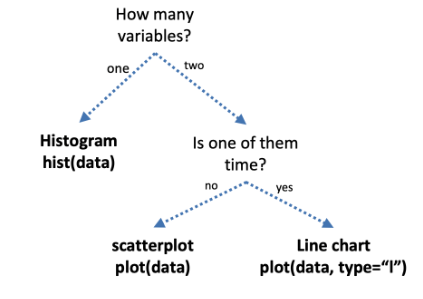
</div>

SI BIEN ESTA GRÁFICA AYUDA, NO ES DEL TODO COMPLETA

### Análisis de correlación

Puede usarse el coeficiente phik para analizar correlaciones entre todo tipo de variables

### Entre categóricas

Veremos el uso de las __tablas de contingencia__ y las gráficas empleadas para su visualización

Una __tabla de contingencia__ es un tipo de tabla que resume la relación entre dos variables categóricas.

pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)[source]

Calcula una tabulación cruzada de dos o más grupos (en R se llaman factores). Por defecto su salida es una tabla de frecuencias, a menos que se le pase un arreglo de valores y una función de agregación.

Los valores se pueden mostrar normalizados (proporciones)

In [ ]:
# Crear todas las combinaciones entre categóricas no dummies

from itertools import permutations
perm_sin_rep = [i for i in permutations(['trt','celltype','prior_10','status_1'],r =2)]

output = set(map(lambda x: tuple(sorted(x)),perm_sin_rep))
output

In [ ]:
pd.crosstab(index=df['celltype'], columns=df['prior_10'])

### Tablas de contingencia para todas las combinaciones

+ Podemos usar el argumento margins=True para agregar los totales de margen a la tabla de contingencia
+ Primero se mostrarán con los conteos y después normalizados (proporciones)

In [ ]:
for i in output:
    print(pd.crosstab(index=df[i[0]], columns=df[i[1]], margins=True))
    print('-------------------------')
    

In [ ]:
# Se muestra con porcentajes y dos lugares decimales
for i in output:
    print(pd.crosstab(index=df[i[0]], columns=df[i[1]], margins=True, normalize=True).round(4)*100)  
    print('-------------------------')
    

### Ejercicio: visualizar resultados de las tablas de contingencia

### Tablas dinámicas: Pivot table con pandas
Ver otros ejemplos en https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)

Crea una tabla dinámica al estilo de una hoja de cálculo como DataFrame.

Los niveles en la tabla dinámica se almacenarán en objetos MultiIndex (índices jerárquicos) en el índice y las columnas del DataFrame de resultado.

Las combinaciones para las tablas dinámicas dependen de las preguntas de investigación

Ejemplo: ¿Está balanceada la cantidad de pacientes que mueren (status =1) por tipo de célula y tratamiento?

In [ ]:
# Crear combinaciones para las tablas dinámicas

In [ ]:
table = pd.pivot_table(df, values='status_1',  index=['trt'],columns=['celltype'],
                       aggfunc=np.sum,margins=True)
table

In [ ]:
# Pregunta de investigación: ¿Cuál es el promedio de edad de los pacientes en cada tipo de tratamiento?
table1 = pd.pivot_table(df, values='age',  index=['trt']).round(2)
table1

In [ ]:
# Pregunta de investigación: ¿Cuál es el promedio de edad de los pacientes en cada tipo de tratamiento, separando a los que tuvieron o no tratamiento previo?
table2 = pd.pivot_table(df, values='age',  index=['trt'],columns=['prior_10'] ).round(2)
table2

In [ ]:
# Pregunta de investigación: ¿Cuál es el promedio de días de vida desde que entraron al estudio de los pacientes en cada tipo de tratamiento,
# separando a los que tuvieron o no tratamiento previo?
table3 = pd.pivot_table(df, values='time',  index=['trt','prior_10'] ).round(2)
table3

In [ ]:
edad = pd.qcut(df['age'], 4)
df.pivot_table('time', ['trt',edad])

In [ ]:
ik = pd.qcut(df['karno'], 4)
table4 = df.pivot_table('time', ['trt',ik])
table4

In [ ]:
# Graficar la cantidad de muertes por día para cada tratamiento
sns.lineplot(data=df, x="time", y="karno", hue='trt')

### Entre categóricas y numéricas

Una de las técnicas más usadas es el Análisis de Varianza (ANOVA)

### Entre numéricas

In [ ]:
sns.boxplot(data=df,x='time',y='trt')


#### Tamaño de la muestra para variable time (continua)

+ Usemos como media del tiempo 150 días y desviación estándard de 90 días para el tratamiento 1 (basados en supuestos reportes de literatura anteriorres)

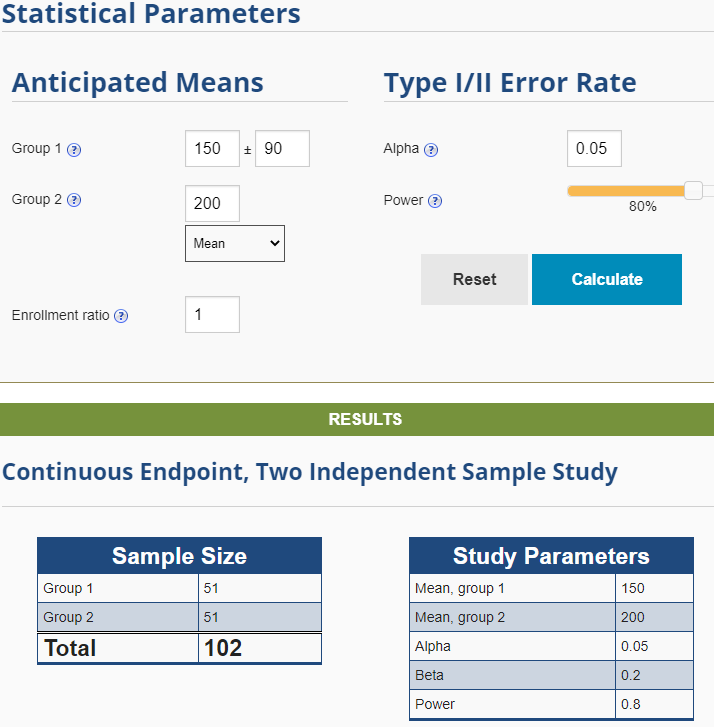

Para este estudio, según esta regla, el tamaño de la muestra es suficiente

+ Algunos autores recomiendan muestras de 100 + 50*i, donde i es la cantidad de variables

Para i =1 (una sola variable predictora) se requieren 150 observaciones


#### Tamaño de la muestra para variable status (dicotómica)

+ Para estudios con variable de salida dicotómica y una muestra https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_power/bs704_power_print.html

+ Aquí no es posible: se tienen datos de 137 veteranos. Simplemente la potencia del estudio será menor. Ver calculadora: https://clincalc.com/stats/samplesize.aspx
Un grupo tiene el 50.36% de la muestra y el otro el 49.64%
+ Note la cantidad tan grande de observaciones que requerimos para un estudio con potencia de 80% y nivel de significancia alfa de 0.05
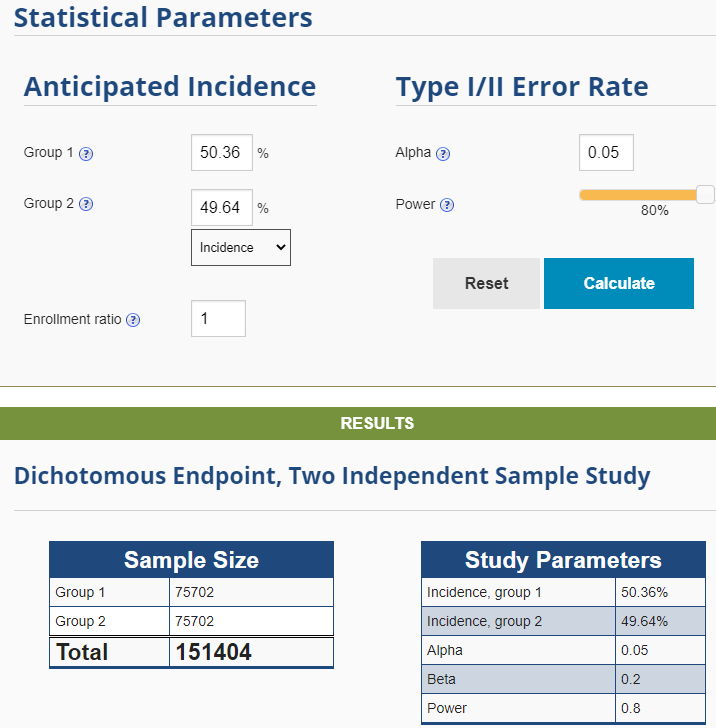

In [ ]:
df.trt.value_counts(normalize=True)

#### Calculando la frecuencia y proporción de cada grupo de tipo de célula para el ANOVA

Si agregamos la pregunta de investigación: ¿Qué grupo de células tiene menos supervivencia después de 999 días? podemos hacer un análisis de varianza con las siguientes hipótesis:

    + __Ho:__ No hay diferencia entre grupos: las medias para la variable dependiente (time, por ejemplo) son iguales
    + __Ha:__ Hay al menos un grupo diferente (al menos una media diferente)

In [ ]:
cel_count = df.celltype.value_counts()
cel_count

In [ ]:
cel_count.values

In [ ]:
prop_cel = df.celltype.value_counts(normalize=True)
prop_cel

### Gráfica de pie y de dona para categóricas con menos de 6 categorías

+ Para baja cardinalidad; normalmente 6 o menos categorias y datos expresados en proporciones o porcentajes

In [ ]:
#palette_color = sns.color_palette('bright')
plt.title('Porcentaje de tipos de células de cáncer de pulmón en la muestra')  
# Método de plt
plt.pie(prop_cel, labels=prop_cel.index, autopct='%.1f%%')
#plt.pie(prop_cel, labels=prop_cel.index, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [ ]:
plt.pie(prop_cel, labels=prop_cel.index,
        autopct='%1.1f%%', pctdistance=0.75,
        )
  
# Dibuja círculo
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
  
# Adiciona círculo al pie
fig.gca().add_artist(centre_circle)
  
plt.title('Porcentaje de tipos de células cancerígenas en la muestra')
  
#plt.show()

### Hallazgos
+ No hay desbalance severo entre las muestras de cada tipo de célula
+ La mayoría de los veteranos tiene cáncer de pulmón de célula pequeña

### Histograma (recomendado para variables de intervalo y razón)

+ Un histograma es una herramienta de visualización clásica que representa la distribución de una o más variables al contar el número de observaciones que se encuentran dentro de contenedores discretos (bins).

+ La función histplot() de seaborn puede normalizar la estadística calculada dentro de cada contenedor para estimar la frecuencia, la densidad o la masa de probabilidad, y puede agregar una curva suave obtenida mediante una estimación de la densidad del kernel, similar a kdeplot().

+ seaborn.histplot() calcula la cantidad de contenedores (bin)s. La elección de los contenedores para calcular y trazar un histograma puede ejercer una influencia sustancial en los conocimientos que uno puede extraer de la visualización. Si los contenedores son demasiado grandes, pueden borrar funciones importantes. Por otro lado, los contenedores que son demasiado pequeños pueden estar dominados por la variabilidad aleatoria, lo que oscurece la forma de la verdadera distribución subyacente. El tamaño del contenedor predeterminado se determina mediante una regla de referencia que depende del tamaño y la varianza de la muestra. Esto funciona bien en muchos casos (es decir, con datos de "buen comportamiento") pero falla en otros. Siempre es bueno probar diferentes tamaños de contenedores para asegurarse de que no se está perdiendo algo importante. Esta función le permite especificar contenedores de varias maneras diferentes, como establecer el número total de contenedores que se usarán, el ancho de cada contenedor o las ubicaciones específicas donde los contenedores deben dividirse.

http://citadel.sjfc.edu/faculty/kgreen/DataAM_Web/TextBook/MSTI130_TextFall2011_Chapter%2005.pdf

### Se puede, pero no se debe usar histogramas para categóricas

In [ ]:
fig,ax = plt.subplots(figsize=(4,2))
# hist() es método de pandas
# En el eje y se muestra frecuencia
df.celltype.hist()  # 10 bins por defecto 
# En este caso se recomienda el diagrama de barras

### Conclusión

+ El histograma debe usarse para variables de intervalo o razón y NO para una nominal, como es este caso.
+ Lo correcto es usar el diagrama de barras, como se muestra a continuación
+ Este diagrama muestra de mayor a menor las frecuencias de ocurrencia

In [ ]:
plt.bar(x=cel_count.index,height=cel_count.values)

## Exploración de cantidad de muestras por categoría

+ Sirve, entre otras cosas, para detectar desbalance y muestras muy pequeñas
+ Note que la mayor cantidad de pacientes tiene cancer con tipo de célula smallcell
+ Solo 9 pacientes fueron censurados (no ocurrió el evento de muerte antes de findel estudio
+ Solo 40 pacientes habían tenido otros tratamientos previos

In [ ]:
for i in nominales + ordinales:
    print(i)
    df[i].value_counts()
    print()

In [ ]:
df.karno.mode()

In [ ]:
#plt.subplots?

## Conversión a dummy

In [ ]:
#pd.get_dummies?

In [ ]:
df_dum_todas = pd.get_dummies(df)
df_dum_todas

In [ ]:
df_dum_todas.celltype_adeno.sum(),df_dum_todas.celltype_large.sum(),df_dum_todas.celltype_smallcell.sum(),df_dum_todas.celltype_squamous.sum()

In [ ]:
df_dum = pd.get_dummies(df,drop_first=True) # toma solo las categóricas y usa k-1
df_dum

In [ ]:
df_dum.celltype_large.sum(),df_dum.celltype_smallcell.sum(),df_dum.celltype_squamous.sum()

In [ ]:
df_dum = pd.concat([df[['trt','prior','celltype']], df_dum], axis=1) 
df_dum

In [ ]:
df_dum.to_csv('dataset-25346_dum.csv',index=False,encoding='utf-8')

In [ ]:
type(df)

In [ ]:
type(df.iloc[1])

### Análisis univariado para intervalo y razón

+ Vamos a tratar a karno com variable de intervalo para hacer el histograma

In [ ]:
fig,ax = plt.subplots(figsize=(4,2))
sns.histplot(data=df,x='karno')
# seaborn determina que 9 bins es lo mejor

In [ ]:
# Note que al cambiar a 20 bins se resaltan rangos de valores en los que no hay muestras
fig,ax = plt.subplots(figsize=(4,2))
sns.histplot(data=df,x='karno', bins=20)

In [ ]:
fig,ax = plt.subplots(figsize=(5,3))
sns.histplot(data=df, x="time", hue='status',kde=True)

### Interpretación

+ No hay datos entre el día 600 y el 1000. Este último es un dato atípico (outlier)
+ La mayoría de los veteranos muere antes del día 200
+ Muy pocos veteranos se salieron del estudio (status=0)

### Uso de escala logarítmica

In [ ]:
fig,ax = plt.subplots(figsize=(5,3))
sns.histplot(data=df, x="time", kde=True,log_scale=True) # por defecto es logaritmo en base 10

### Interpretación

+ Pocos pacientes murieron antes de los 10 días esde el inicio del estudio.
+ La mayor cantidad murió alrededor de los 100 días

In [ ]:
df['log_time'] = np.log10(df['time'])
df['log_time']

### Interpretación

+ Esta nueva variable (nueva característica) tiene una distribución más cercana a la normal y pudiera ser considerada como nuevo "feature" 

In [ ]:
for i in nominales + ordinales:
    print(i)
    df[i].describe()
    print()

+ Si karno es ordinal, el resultado anterior del describe() no es válido. Solo tomamos moda y mediana para el dato ordinal

In [ ]:
#df.karno.plot.box()
# Este boxplot es solo si se considera de intervalo, NO SI ES ORDINAL
fig,ax = plt.subplots(figsize=(4,2))
sns.boxplot(x=df.karno,ax=ax)

## Crear DataFrame filtrando solo a los del tratamiento 1

In [ ]:
df_1 = df[df.trt ==1]
df_1

In [ ]:
df1_cen = df_1[df_1['status']==0]
df1_cen

In [ ]:
f'Cantidad de observaciones censuradas para el tratamiento 1: {len(df1_cen)}'

## Gráficos de barra, de cajas, de punto, de violín

Un __gráfico de barras__ representa una estimación de la tendencia central de una variable numérica con la altura de cada rectángulo y __proporciona alguna indicación de la incertidumbre en torno a esa estimación__ utilizando barras de error. Los diagramas de barras incluyen 0 en el rango del eje cuantitativo y son una buena opción cuando 0 es un valor significativo para la variable cuantitativa y desea realizar comparaciones con ella.

__Para conjuntos de datos en los que 0 no es un valor significativo__, un __gráfico de puntos__ le permitirá centrarse en las __diferencias entre los niveles de una o más variables categóricas__.

También es importante tener en cuenta que un diagrama de barras muestra solo el valor medio (u otro estimador), pero en muchos casos __puede ser más informativo mostrar la distribución de valores en cada nivel de las variables categóricas__. En ese caso, otros enfoques, como un __diagrama de caja o de violín__, pueden ser más apropiados.

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=df, y="karno",errcolor='orange')
# Aquí el intervalo de confianza es del 95% (ci), calculado con 1000 bootstraps

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x ="karno")
# Aquí el intervalo de confianza es del 95% (ci), calculado con 1000 bootstraps

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=df, x="celltype", y="karno")
plt.title('Media de karno para cada tipo de célula')  # Suponiendo que es de razón, en lugar de ordinal
plt.show()

### Interpretación

+ Se grafica la media del karno para cada tipo de célula, observando que la media mayor es del tipo large y la menor es la de smallcell 
+ Los que tienen cáncer de célula pequeña tienen una menor calidad de vida diaria como promedio.


### Diagrama de puntos

Un gráfico de puntos representa una estimación de la tendencia central de una variable numérica por la posición del punto y proporciona alguna indicación de la incertidumbre en torno a esa estimación utilizando barras de error.

Los gráficos de puntos pueden ser más útiles que los gráficos de barras para centrar las comparaciones entre diferentes niveles de una o más variables categóricas. Son particularmente hábiles para mostrar interacciones: cómo cambia la relación entre los niveles de una variable categórica a través de los niveles de una segunda variable categórica. Las líneas que unen cada punto del mismo nivel de tonalidad permiten juzgar las interacciones por diferencias de pendiente, lo que es más fácil para los ojos que comparar las alturas de varios grupos de puntos o barras.


In [ ]:
plt.figure(figsize=(4,3))
# Suponiendo que karno es de razón, en lugar de ordinal
sns.pointplot(data=df, x="celltype", y="karno",hue='trt',dodge=True) # dodge evita la superposición al graficar

### Interpretación

+ La puntuación de karno es, como promedio, menor para los del tratamiento 2 que para los del tratamiento 1, excepto para las células de tipo squamous
+ La mayor diferencia se encuentra en los pacientes con células de tipo large, donde la puntuación karno es mucho mayor para los de tratamiento 1. Por el contrario, en pacientes con células tipo squamous, el karno es mucho mayor, como promedio con el tratamiento 2.


### Diagrama de violín

Un diagrama de violín juega un papel similar al de un diagrama de caja y bigotes. Muestra la distribución de datos cuantitativos a través de varios niveles de una (o más) variables categóricas de modo que esas distribuciones puedan compararse.__A diferencia de un diagrama de caja__, en el que todos los componentes del diagrama corresponden a puntos de datos reales, el diagrama de violín __presenta una estimación de la densidad del núcleo de la distribución subyacente__.

Esta puede ser una forma eficaz y atractiva de mostrar múltiples distribuciones de datos a la vez, pero tenga en cuenta que el procedimiento de estimación está influenciado por el tamaño de la muestra, y los violines para muestras relativamente pequeñas pueden parecer engañosamente fluidos.

## Wide form y long form

https://www.statology.org/long-vs-wide-data/

Un conjunto de datos se puede escribir en dos formatos diferentes: ancho y largo.

+ Un formato ancho contiene valores que no se repiten en la primera columna.

+ Un formato largo contiene valores que se repiten en la primera columna.

Observe los siguientes ejemplos tomados de la página referenciada anteriormente:

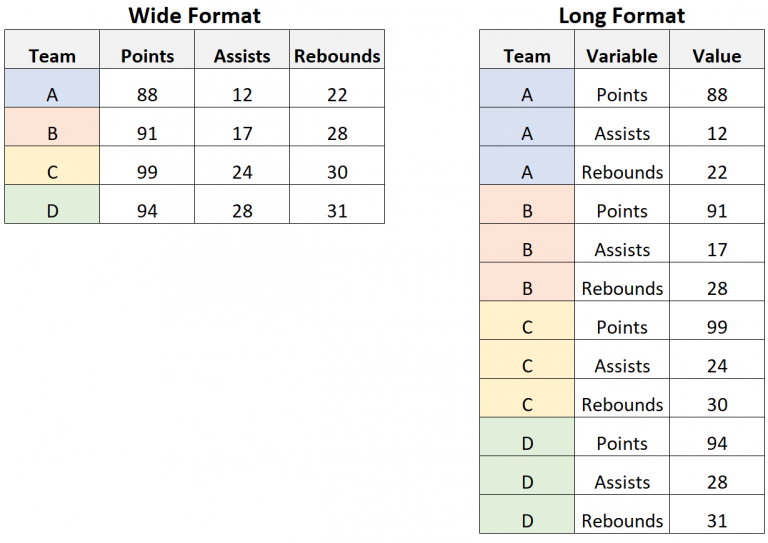

+ Para el ejemplo, Team es llave primaria en el formato wide.
+ Para el ejemplo, Team + Variable es llave primaria compuesta (identifica unívocamente a value)
+ Note que en la transformación los nombres de dos columnas se convirtieron en categorías de la columna Variable y los valores de las respectivas columnas se pasaron a valores de la columna Value
+ pandas.melt() permite llevar de wide format a long format

In [ ]:
#sns.violinplot?

In [ ]:
# Suponiendo que karno es de razón, en lugar de ordinal
plt.figure(figsize=(4,3))
sns.violinplot(x=df["karno"]) # por defecto dibuja un boxplot en miniatura

In [ ]:
# Suponiendo que karno es de razón, en lugar de ordinal
plt.figure(figsize=(4,3))
sns.violinplot(x=df["karno"],inner='quartile')

In [ ]:
# Suponiendo que karno es de razón, en lugar de ordinal
plt.figure(figsize=(4,3))
sns.violinplot(x=df["karno"],inner='stick')

### Interpretación

+ La puntuación de karno tiene una densidad mayor entre 60 y 80, con un pico cercano a 70 y con mediana en 60

In [ ]:
plt.figure(figsize=(5,3))
sns.violinplot(x=df["celltype"],y=df["karno"])
sns.lineplot(x=df["celltype"],y=df["karno"]) # agrega las medias y sombreado el intervalo con las desviaciones
plt.show()

### Interpretación

+ Para pacientes con células adeno, large y smallcell las medias de karno son menores que las medianas
+ Los pacientes con media y mediana mayor son los de célula large, por lo que tienen mejor calidad de vida
+ La mayor dispersión en calidad de vida la tienen los pacientes con célula adeno
+ Los pacientes con smallcell parecen estar en dos grupos en relación a karno: unos alrededor de 30 y otros alrededor de algo menos a 70

In [ ]:
plt.figure(figsize=(5,4))
sns.violinplot(x=df["celltype"],y=df["karno"],hue=df["trt"], split=True)


### Interpretación


In [ ]:
sns.barplot(data=df, x="karno", y="trt")

### Interpretación


In [ ]:
sns.histplot(data=df,x=df.celltype)
# Se debe usar diagrama de barra para este caso porque la variable es categórica de baja cardinalidad

### Interpretación

+ Como hay 4 valores, automáticamente seaborn hace 4 bins y es un gráfico similar al countplot(), pero el correcto es este último y no el histplot()
+ Deben usar una gráfica de barra (countplot es de barra) para categóricas
¡No usar hist plot!


In [ ]:
sns.countplot(data=df,x=df.celltype)

In [ ]:
plt.hist(df.celltype) # Este es de matplotlib y quedan separadas porque por defecto usa 10 bins

## Ejercicio para resaltar la diferencia de sintaxis en matplotlib y seaborn para enviar un plot a un eje

In [ ]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(6,4),sharey=True)
#eje.plot
axs[0].hist(df.celltype)

#eje = plot
axs[1] = sns.histplot(data=df,x=df.celltype)

plt.suptitle('Histogramas')
plt.xticks(rotation=45)
plt.show()

### Interpretación

+ Notar que la cantidad de bins por defecto con seaborn y matplotlib es diferente. 
Los histogramas no son adecuados para este cao. Note que no cambia de colores como en el countplot()


### Diagramas categóricos

In [ ]:
plt.figure(figsize=(4,4))
sns.catplot(data=df, x="karno", y="celltype")

### Interpretación

+ Muestra diferencias en la dispersión de karno para cada tipo de célula
+ Los valores de karno más altos y más bajos con para células adeno, siendo el rango más amplio.


In [ ]:
sns.catplot(data=df, x="karno", y="celltype", hue="trt", kind="boxen")

### Interpretación

+ Las medianas de karno para células adeno y large son iguales, tanto para el tratamiento 1 como para el 2
+ Las medianas de karno para smallcell y squamous de tratamiento 1 son iguales
+ Todas las medianas de karno para todos los tipos de célula son menores en el tratamiento 2 que en el 1, excepto para squamous
+ los karno para smallcell de tratamiento 2 y de adeno tratamiento 1 tienen los IQR mayores


In [ ]:
sns.catplot(data=df, x="karno", y="celltype", kind="violin", color=".9", inner=None)
sns.swarmplot(data=df, x="karno", y="celltype", size=3)

### Interpretación

+ para pacientes con célula large se observa una mejor calidad de vida, teniendo concentrados sus valores (curva más abultada)  más a la derecha y alrededor de 70.


In [ ]:
# No se crean subplots con matplotlib
# Se crea un objeto g de la clase FacetGrid para hacer múltiples plots y se maneja con height y aspect el tamaño
g = sns.catplot(
    data=df, x="trt", y="karno", col="celltype",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Karnovsky index")
g.set_xticklabels(["T1", "T2"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 100))
g.despine(left=True)

In [ ]:
type(g)

### Interpretación

+ La mayor calidad de vida promedio es para células large con tratamiento 1, pero con una dispersión muy grande (desviación estándard)
+ La menor calidad de vida promedio es para células smallcell con tratamiento 2



In [ ]:
profile = ProfileReport(df[['trt', 'celltype', 'time', 'status', 'karno', 'diagtime', 'age',
       'prior']], title="Reporte de veteranos")

In [ ]:
profile

In [ ]:
profile.to_file(output_file='veteranos_EDA.html')

In [ ]:
df_dum.columns

In [ ]:
profile_dum = ProfileReport(df_dum[['time', 'karno', 'diagtime', 'age', 'trt_2', 'celltype_large', 'celltype_smallcell',
       'celltype_squamous', 'status_1', 'prior_10']], title="Reporte de veteranos")

In [ ]:
profile_dum

In [ ]:
profile_dum.to_file(output_file='veteranos_dum.html')

## Análisis bivariado

+ Usar jointplot de seaborn para gráficas bivariadas con distribuciones marginales univariadas

In [ ]:
sns.jointplot(data=df, x="karno", y="age")

### Interpretación
+ 

In [ ]:
df.columns

In [ ]:
sns.jointplot(data=df, x="time", y="age", hue="celltype",kind="kde")


### Interpretación
+ La mayor densidad de muertes tempranas es para pacientes con célula smallcell, seguido de adeno
+ El rango de edades más amplio es el de pacientes con célula adeno y tiene al los más longevos (pasados los 90 años)

### Limita a no graficar tiempo transcurrido menos de 0

In [ ]:
sns.jointplot(data=df, x="time", y="age", hue="celltype",xlim=(0,df.time.max()),kind="kde")


### Interpretación

+ La mayoría de los pacientes tiene entre 60 y 70 años

In [ ]:
sns.jointplot(data=df, x="time", y="age",kind="reg")

### Interpretación

+ La mayoría murió antes de los 200 días
+ La mayoría de los pacientes tiene entre 60 y 70 años

In [ ]:
sns.jointplot(data=df, x="diagtime", y="age",kind="hist",height =4)

### Interpretación

+ El cuadro más oscuro indica la mayor concentración de edad con tiempo de diagnóstico que es entre 60 y 65 años en la primera semana del estudio

In [ ]:
df.columns

In [ ]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(data=df[['trt', 'celltype', 'time', 'status', 'karno', 'diagtime', 'age',
       'prior']], hue='status', height=3)
plt.show()

### Interpretación

+ Los puntos azules son los pacientes censurados, porqque se salieron del estudio o porque al finalizar el mismo no habían fallecido. Son muy pocos casos.
+ 

### Covarianza

In [ ]:
intervalo + razon

In [ ]:
df.status.info()

In [ ]:
cov = df[intervalo + razon].cov()

In [ ]:
cov_dum = df_dum[['time', 'karno', 'diagtime', 'age', 'trt_2', 'celltype_large', 'celltype_smallcell',
       'celltype_squamous', 'status_1', 'prior_10']]

### Correlación

In [ ]:

corrPearson = df[intervalo + razon ].corr()  # Con Pearson solo para variables de intervalo y razón
corrPearson.round(3)

In [ ]:

corrPearson_dum = df_dum[['time', 'karno', 'diagtime', 'age', 'trt_2', 'celltype_large', 'celltype_smallcell',
       'celltype_squamous', 'status_1', 'prior_10']].corr()  # Con Pearson solo para variables de intervalo y razón
corrPearson_dum.round(3)

In [ ]:
sns.heatmap(corrPearson_dum.round(2),annot=True)

In [ ]:
import phik
from phik import resources, report

In [ ]:
# get the phi_k correlation matrix between all variables

pm = df_dum.drop('log_time',axis=1).phik_matrix(interval_cols = ['time', 'karno', 'diagtime', 'age'] )
pm.round(3)

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(pm.round(1),annot=True)

### Análisis de regresión

+ Durante el EDA se emplea para probar relaciones, no con fin predictivo
+ Puede hacerse una regresión univariada para cada cantidata a variable explicativa. Es bivariada porque analiza variación conjunta entre una variable explicatica y la variable dependiente ('time' en este caso
+ Comenzaremos con una regresión exponencial

In [ ]:
df_dum.columns

## Modelo paramétrico univariado exponencial

__Función de probabilidad de supervivencia acumulada__

$S(t) = \exp\left(\frac{-t}{\lambda}\right),   \lambda >0$

__Función de riesgo acumulado (Tasa de riesgo acumulado)__


$H(t) = \frac{t}{\lambda}$

__Tasa de Riesgo (hazard)__

$h(t) = \frac{1}{\lambda}$


In [ ]:
ExponentialFitter.fit?

In [ ]:
df_model = df_dum[['time', 'karno', 'diagtime', 'age','log_time', 'trt_2', 'celltype_large', 'celltype_smallcell',
       'celltype_squamous', 'status_1', 'prior_10']]

In [ ]:
df_model[df_model['time'] <= 0]

In [ ]:
epf = ExponentialFitter().fit(df_model['time'],df_model['status_1'] )

In [ ]:
epf

In [ ]:
epf.print_summary()

In [ ]:
dir(epf)

In [ ]:
df_model.time.mean()

In [ ]:
import math
math.exp(epf.lambda_)

In [ ]:
epf.lambda_

In [ ]:
1/epf.lambda_  # el riesgo es el inverso de lambda

In [ ]:
epf.hazard_

## Interpretación del resumen del modelo

+ El coeficiente lambda es 130.17 para el modelo epf, por lo que el riesgo es igual a 0.0076 y constante en el tiempo.

+ El error estándar en el modelo epf es de 11.51 (__se__ del inglés standard error) para el coeficiente, estima la variabilidad entre los estimados de coeficientes que se obtendrían si se tomaran muestras de la población una y otra vez. Es una estimación de la desviación estándar del coeficiente. Sirve para valorar la precisión del modelo, comparando con la magnitud del coeficiente.

+ El intervalo de confianza para un 95% está entre 107.63 y 152.73. Se calcula a partir del coeficiente y el error estándar. Si se dispone de un intervalo de confianza del 95 % para una medida absoluta del efecto de la intervención, el error estándar puede calcularse como

    se = (límite superior – límite inferior) / 3.92  # 3.92 es para un 95% de confianza
    (se * 3.92) /2 = (ls -li)/2 que es lo que hay que sumar y restar al coeficiente para obtener el intervalo de confianza 

Es una estimación de la desviación estándar del coeficiente

In [ ]:
epf.plot_survival_function(label='survival function').legend()
epf.plot_hazard(label='hazard').legend()

### Función de masa y función de densidad

### pdf (probability density function)

### cdf (cumulative distribution function)

In [ ]:
epf.plot_density()

In [ ]:
epf.plot_cumulative_hazard()

In [ ]:
epf.plot_cumulative_density()

In [ ]:
epf.event_table

In [ ]:
#from sklearn